### Black Friday Sales Prediction

#### Import Necessary Libraries

In [1]:
import numpy as np#Numerical python
import pandas as pd #To read data
import matplotlib.pyplot as plt#Visualization library
import seaborn as sns#Visulization library
from sklearn.model_selection import train_test_split#To split train and test data
from sklearn.linear_model import LinearRegression#Linear regression model
from sklearn import metrics #to know metrics of true and predicted data
import statsmodels.api as sm #OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor#Statistics of correlation
import datetime

In [2]:
#Tree based models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
#import data
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

sample_df = pd.read_csv('sample_submission.csv')

### EDA

In [4]:
train_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
sample_df.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


observations Product_Category_2 has 376430 rows and Product_Category_3 has 166821 rows in 550068 total no. of rows

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [8]:
test_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

observations Product_Category_2 has 161255 rows and Product_Category_3 has 71037 rows in 233599 total no. of rows

In [15]:
train_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [9]:
#Concating train and test data
train_df ['Source'] = 'train'

test_df ['Source'] = 'test'

df = pd.concat([train_df, test_df])

In [10]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0,train
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0,train
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0,train


In [11]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN,test


In [12]:
#Checking for shape after concatenation
df.shape

(783667, 13)

In [13]:
#ratio of null values
df.isna().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Purchase                      0.298085
Source                        0.000000
dtype: float64

<AxesSubplot:>

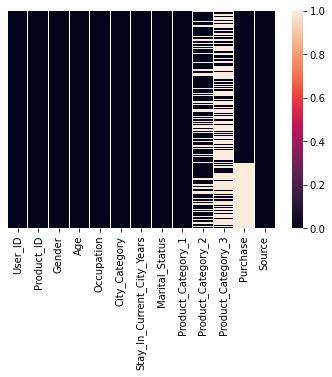

In [14]:
sns.heatmap(df.isnull(), yticklabels=False)
#null values in data frame

In [23]:
df.describe(include='all')
#Basic statistics

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,783667
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN,train
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN,550068
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713,NaN
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394,NaN
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000,NaN
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000,NaN
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000,NaN
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000,NaN


In [15]:
#No. of Unique values in User_Id
df.User_ID.nunique()

5891

In [16]:
df.User_ID.value_counts()
#Frequency of unique values.

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1005117      13
1004991      13
1000708      13
1005804      13
1000341      13
Name: User_ID, Length: 5891, dtype: int64

In [17]:
#No of Unique values in Product_ID
df.Product_ID.nunique()

3677

In [24]:
df['Product_ID'].value_counts()
#Frequency of Product ID's unique values

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00315342       1
P00081642       1
P00012942       1
P00156942       1
P00038842       1
Name: Product_ID, Length: 3677, dtype: int64

In [25]:
df.duplicated(subset=['User_ID']).sum()

777776

In [35]:
df[df.Product_ID == 'P00085442']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
322,1000053,P00085442,M,26-35,0,B,1,0,12,14.0,NaN,1752.0,train
973,1000169,P00085442,M,26-35,7,B,3,0,12,14.0,NaN,1434.0,train
2024,1000323,P00085442,M,46-50,12,C,1,0,12,14.0,NaN,1714.0,train
11978,1001796,P00085442,M,51-55,11,C,2,1,12,14.0,NaN,1423.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226847,1001587,P00085442,F,26-35,3,B,3,0,12,14.0,NaN,NaN,test
229759,1000035,P00085442,M,46-50,1,C,4+,1,12,14.0,NaN,NaN,test
230357,1001051,P00085442,F,26-35,0,A,0,1,12,14.0,NaN,NaN,test
232668,1004579,P00085442,F,18-25,4,B,1,1,12,14.0,NaN,NaN,test


In [21]:
df[df.Product_ID == 'P00085442'].isna().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3            496
Purchase                      155
Source                          0
dtype: int64

Observation : Product_Category_1, Product_Category_2 and Product_Category_3 unique for each category type

In [22]:
df.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender Based Total Purchase'}, xlabel='Gender', ylabel='Total Purchase'>

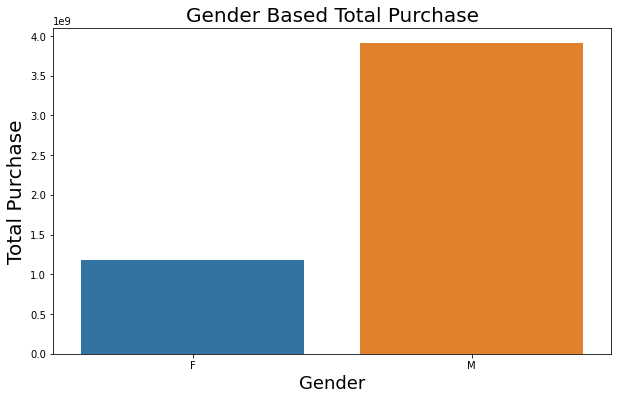

In [37]:
#Male Purchases more compared to female
plt.figure(figsize=(10,6))
plt.xlabel('Gender', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 20)
plt.title('Gender Based Total Purchase', fontsize = 20)
sns.barplot(x = df.Gender.unique(), y = df.groupby('Gender').Purchase.sum().to_list())

In [40]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [45]:
df.groupby('Gender').Purchase.sum()

Gender
F    1.186233e+09
M    3.909580e+09
Name: Purchase, dtype: float64

In [39]:
df.groupby('Gender').Purchase.sum().to_list()

[1186232642.0, 3909580100.0]

In [24]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Age Based Total Purchase'}, xlabel='Age', ylabel='Total Purchase'>

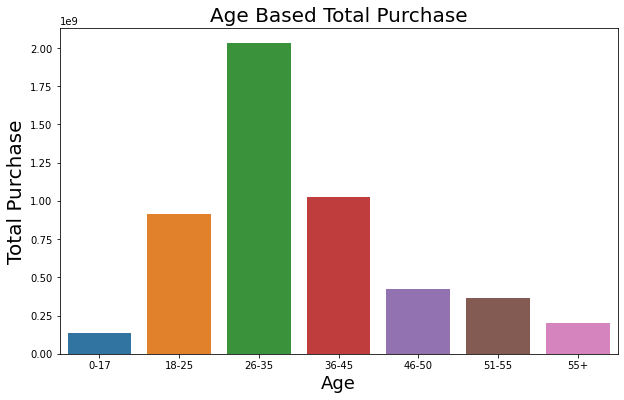

In [25]:
#26-35 Age group people purchases more compared to other age group
plt.figure(figsize = (10,6))
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 20)
plt.title('Age Based Total Purchase', fontsize = 20)
sns.barplot(x = `b, y = df.groupby('Age').Purchase.sum().to_list())

In [46]:
df.groupby('Age').Purchase.sum().index

Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object', name='Age')

In [47]:
df.groupby('Age').Purchase.sum()

Age
0-17     1.349132e+08
18-25    9.138487e+08
26-35    2.031771e+09
36-45    1.026570e+09
46-50    4.208434e+08
51-55    3.670996e+08
55+      2.007674e+08
Name: Purchase, dtype: float64

<AxesSubplot:title={'center':'No. of People across age group'}, xlabel='Age Group', ylabel='No. of People'>

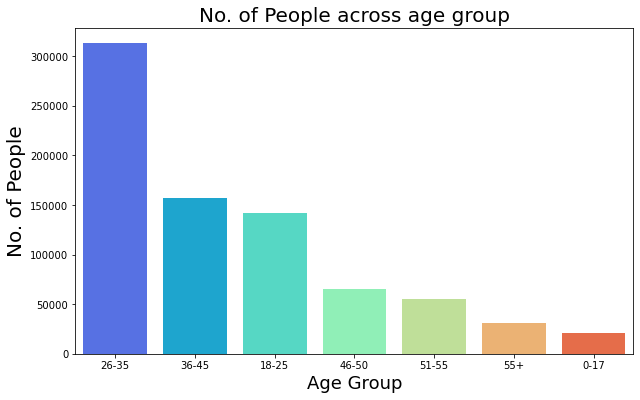

In [26]:
plt.figure(figsize = (10,6))
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('No. of People', fontsize = 20)
plt.title('No. of People across age group', fontsize = 20)
sns.barplot(x = df.Age.value_counts().keys(), y = df.Age.value_counts().values, palette='rainbow')

In [27]:
df.Occupation.value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

<AxesSubplot:title={'center':'Occupation Based Total Purchase'}, xlabel='Occupation', ylabel='Total Purchase'>

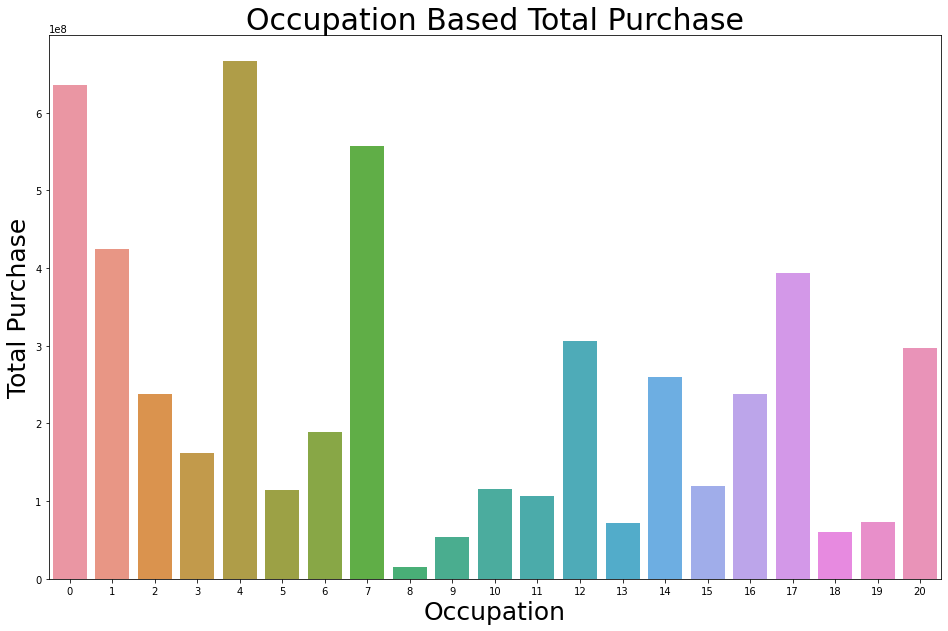

In [28]:
plt.figure(figsize = (16,10))
plt.xlabel('Occupation', fontsize = 25)
plt.ylabel('Total Purchase', fontsize = 25)
plt.title('Occupation Based Total Purchase', fontsize = 30)
sns.barplot(x = list(range(21)), y = df.groupby('Occupation').Purchase.sum().to_list())

In [29]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

<AxesSubplot:title={'center':'City Based Total Purchase'}, xlabel='City Category', ylabel='Total Purchase'>

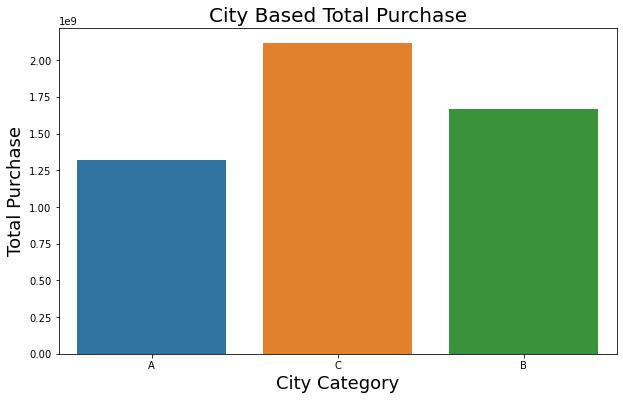

In [30]:
plt.figure(figsize = (10,6))
plt.xlabel('City Category', fontsize = 18)
plt.ylabel('Total Purchase', fontsize = 18)
plt.title('City Based Total Purchase', fontsize = 20)
sns.barplot(x = df.City_Category.unique(), y = df.groupby('City_Category').Purchase.sum().to_list())

In [31]:
df['Stay_In_Current_City_Years'].value_counts()
#Frequency of stay in current city years's unique values.

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [32]:
df.Marital_Status.value_counts()
#Marital status frequency

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [33]:
df.groupby(['Product_ID'])['Product_Category_1'].value_counts().sort_values(ascending = False)

Product_ID  Product_Category_1
P00265242   5                     2709
P00025442   1                     2310
P00110742   1                     2292
P00112142   1                     2279
P00046742   1                     2084
                                  ... 
P00106242   8                        1
P00106342   8                        1
P00081342   5                        1
P00081642   8                        1
P00149742   5                        1
Name: Product_Category_1, Length: 3677, dtype: int64

In [34]:
df.Product_ID.value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00298342       1
P00132742       1
P00295642       1
P00239542       1
P00064542       1
Name: Product_ID, Length: 3677, dtype: int64

<AxesSubplot:ylabel='Frequency'>

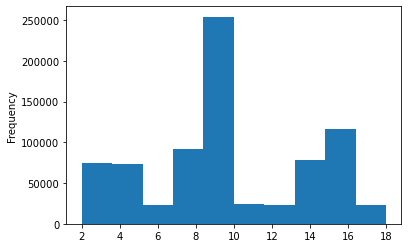

In [35]:
#Filling missing values with median
df.Product_Category_2.fillna(df.Product_Category_2.median()).plot.hist()

<AxesSubplot:>

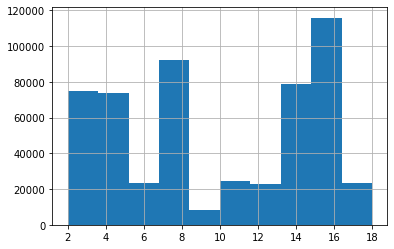

In [36]:
df.Product_Category_2.hist()
#Historgram before replacing null values in Product Category 2.

In [37]:
i = 0
def fill_null_values(x):
    x.fillna(i)
    i+=1

In [16]:
null = df.loc[:,['Product_ID','Product_Category_2']]

In [17]:
null

,Product_ID,Product_Category_2
0,P00069042,NaN
1,P00248942,6.0
2,P00087842,NaN
3,P00085442,14.0
4,P00285442,NaN
...,...,...
233594,P00118942,NaN
233595,P00254642,8.0
233596,P00031842,5.0
233597,P00124742,16.0


In [18]:
null[null['Product_Category_2'].isna()]

,Product_ID,Product_Category_2
0,P00069042,NaN
2,P00087842,NaN
4,P00285442,NaN
9,P00274942,NaN
11,P00014542,NaN
...,...,...
233576,P00313342,NaN
233585,P00161142,NaN
233590,P00252442,NaN
233593,P00255442,NaN


In [19]:
null_PRod_List = list(set(null[null['Product_Category_2'].isna()]['Product_ID']))
#Getting unique product ID's which has null values in Product category 2.

In [20]:
null_PRod_List

['P00259242',
 'P00267742',
 'P00302542',
 'P00005442',
 'P00352042',
 'P00119442',
 'P00371644',
 'P00311842',
 'P00053242',
 'P00250242',
 'P00139642',
 'P00336542',
 'P00108342',
 'P00121242',
 'P00213542',
 'P00213642',
 'P00063542',
 'P00058942',
 'P00356142',
 'P00305842',
 'P00174942',
 'P00349542',
 'P00065542',
 'P00323642',
 'P00313742',
 'P00008142',
 'P00033542',
 'P00142242',
 'P00213342',
 'P00327342',
 'P00280242',
 'P00007942',
 'P00360242',
 'P00295642',
 'P00009742',
 'P00291142',
 'P00076642',
 'P00264942',
 'P00007642',
 'P00344942',
 'P00047342',
 'P00033442',
 'P00009242',
 'P00291742',
 'P00007742',
 'P00146642',
 'P00017042',
 'P00130142',
 'P00117742',
 'P00119042',
 'P00256342',
 'P00138942',
 'P00076142',
 'P00236742',
 'P00061542',
 'P00017242',
 'P00012042',
 'P00280642',
 'P00209342',
 'P00362442',
 'P00298342',
 'P00022242',
 'P00230142',
 'P00129642',
 'P00280442',
 'P00177842',
 'P00299542',
 'P00259942',
 'P00291342',
 'P00158442',
 'P00038542',
 'P001

In [21]:
df[df['Product_ID']== null_PRod_List[0]]['Product_Category_2']

4680     NaN
17425    NaN
24468    NaN
24822    NaN
31656    NaN
          ..
207952   NaN
210953   NaN
211041   NaN
211451   NaN
217262   NaN
Name: Product_Category_2, Length: 183, dtype: float64

In [22]:
len(null_PRod_List)
#1860 Product ID's have null values in Product Category 2

1860

In [23]:
ran = np.arange(2,18)
#Replacing null values of product category 2, based on the Product ID.
for i in null_PRod_List:
    j = np.random.choice(ran)
    df.loc[df['Product_ID']==i, 'Product_Category_2'] = j

<AxesSubplot:ylabel='Frequency'>

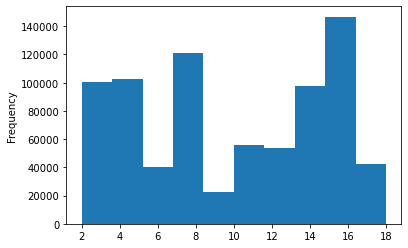

In [50]:
df.Product_Category_2.plot.hist()
#Historgram after replacing null values in Product Category 2 and it seems like distribution of data not differs much.

In [24]:
null_2 = df.loc[:,['Product_ID','Product_Category_3']]

null_PRod_List_2 = list(null_2[null_2['Product_Category_3'].isna()]['Product_ID'])

len(null_PRod_List_2)


545809

In [25]:
null_PRod_List_unique = list(set(null_PRod_List_2))

In [26]:
len(null_PRod_List_unique)
#3148 Product ID's have null values in product category 3

3148

<AxesSubplot:ylabel='Frequency'>

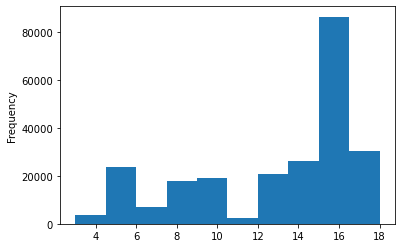

In [54]:
df.Product_Category_3.plot.hist()
#Histogram before replacing null values.

In [27]:
time = datetime.datetime.now()
ran_2 = np.arange(3.0,18.0)
#Replacing null values of product category 3, based on the Product ID.
for i in null_PRod_List_unique:
    ran_num_2 = np.random.choice(ran_2)
    df.loc[df['Product_ID']==i, 'Product_Category_3'] = ran_num_2
print(datetime.datetime.now()-time)

0:03:08.544979


<AxesSubplot:ylabel='Frequency'>

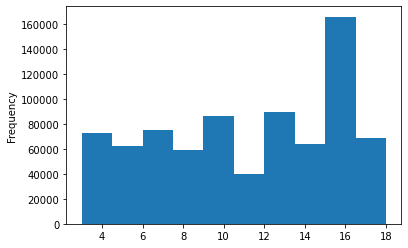

In [56]:
df.Product_Category_3.plot.hist()
#Histogram of Product category 3 after replacing null values.

In [57]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.858585,10.885433,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,4.937607,4.425733,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,7.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,10.000000,11.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [58]:
df.isna().sum()
#No null values in tha input variable

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Source                             0
dtype: int64

In [29]:
df.to_csv('Preprocessed Big Mart data.csv')
#Saving preprocessed data in csv format.

In [28]:
df.Occupation = df.Occupation.apply(lambda x : str(x))

In [30]:
df_number_columns = df.select_dtypes(include=np.number).columns
#Getting column names of numerical datatype.

In [31]:
df_number_columns

Index(['User_ID', 'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

In [32]:
df_category_columns = df.select_dtypes(exclude=np.number).columns

df_category_columns
#Getting column names of object datatype

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Source'],
      dtype='object')

In [33]:
data_to_encode = df[df_category_columns].drop(['Product_ID', 'Source'], axis = 1)

data_to_encode.shape

(783667, 5)

In [34]:
data_to_encode

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,F,0-17,10,A,2
1,F,0-17,10,A,2
2,F,0-17,10,A,2
3,F,0-17,10,A,2
4,M,55+,16,C,4+
...,...,...,...,...,...
233594,F,26-35,15,B,4+
233595,F,26-35,15,B,4+
233596,F,26-35,15,B,4+
233597,F,46-50,1,C,4+


In [36]:
data_encoded = pd.get_dummies(data_to_encode)
#Encoding object datatype column.

data_encoded.shape

(783667, 38)

In [37]:
data_encoded

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
233595,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
233596,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
233597,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
final_df = pd.concat([df[df_number_columns], data_encoded, df[['Product_ID', 'Source']]], axis = 1)
#concatenating number columns , encoded data and other columns.

### Modeling

In [39]:
train_data = final_df.loc[final_df['Source'] == 'train']
#Spliting train data

test_data = final_df.loc[final_df['Source'] == 'test']
#Spliting test data

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Purchase                       550068 non-null  float64
 6   Gender_F                       550068 non-null  uint8  
 7   Gender_M                       550068 non-null  uint8  
 8   Age_0-17                       550068 non-null  uint8  
 9   Age_18-25                      550068 non-null  uint8  
 10  Age_26-35                      550068 non-null  uint8  
 11  Age_36-45                      550068 non-null  uint8  
 12  Age_46-50                     

In [40]:
train_data.drop(['Source', 'Product_ID'] , axis = 1, inplace = True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
test_data.drop(['Source', 'Product_ID'] , axis = 1, inplace = True)

In [42]:
train_X = train_data.drop(['Purchase'], axis = 1)

In [43]:
train_X

,User_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,0,3,16.0,9.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,0,1,6.0,14.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,0,12,6.0,5.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,0,12,14.0,3.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,0,8,12.0,12.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1,20,10.0,4.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
550064,1006035,0,20,13.0,3.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,1,20,13.0,3.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,0,20,13.0,3.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [46]:
train_y = train_data['Purchase']

train_y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [44]:
test_X = test_data.drop('Purchase', axis = 1)

### modelling

In [47]:
lm = LinearRegression()

lm.fit(train_X, train_y)

LinearRegression()

In [48]:
train_pred = lm.predict(train_X)

In [49]:
metrics.r2_score(train_y, train_pred)

0.13068564685874162

In [50]:
metrics.mean_absolute_error(train_y, train_pred)

3586.713302059087

In [82]:
train_y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [83]:
train_pred

array([ 8934.88877861, 10238.88176618,  5536.85308535, ...,
        2557.71043177,  2843.13734119,  2355.56412979])

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

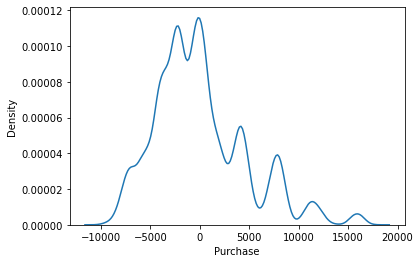

In [84]:
sns.kdeplot(train_y - train_pred)

In [85]:
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))



Train MAE:  3591.6952699821823
Train MSE:  21906307.008703537
Train RSME:  4680.417396846518
Train R2:  0.1317749836890989


In [51]:
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))

Train MAE:  3586.713302059087
Train MSE:  21933792.218866095
Train RSME:  4683.352668640927
Train R2:  0.13068564685874162


<AxesSubplot:xlabel='Purchase'>

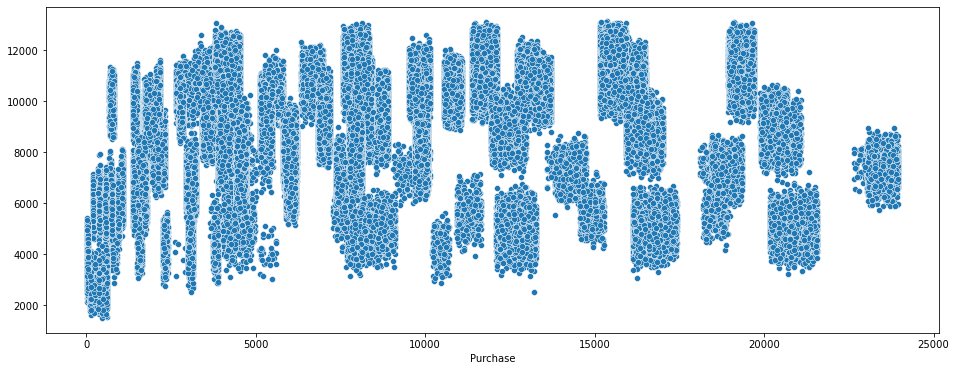

In [52]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = train_y, y = train_pred)

In [53]:
reg_ols = sm.OLS(train_y, train_X).fit()

In [54]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2176.
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        15:36:29   Log-Likelihood:            -5.4296e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550029   BIC:                         1.086e+07
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
User_ID                           0.0121      0.004      3.260      0.001       0.005       0.019
Marital_Status                  -64.6488     13.731     -4.708      0.000     -91.560     -37.737
Product_Category_1             -406.8640      1.707   -238.287      0.000    -410.211    -403.517
Product_Category_2              -62.1297      1.347    -46.122      0.000     -64.770     -59.490
Product_Category_3               43.6364      1.438     30.337      0.000      40.817      46.456
Gender_F                       -478.5623   1516.716     -0.316      0.752   -3451.278    2494.153
Gender_M                        -13.4409   1516.146     -0.009      0.993   -2985.039    2958.157
Age_0-17                       -374.5122    437.250     -0.857      0.392   -1231.509     482.485
Age_18-25                      -339.8259    432.683     -0.785      0.432   -1187.871     508.220
Age_26-35                      -141.3572    433.716     -0.326      0.744    -991.427     708.712
Age_36-45                       -30.4824    433.638     -0.070      0.944    -880.400     819.435
Age_46-50                       -37.5982    434.220     -0.087      0.931    -888.656     813.460
Age_51-55                       306.2772    433.634      0.706      0.480    -543.631    1156.186
Age_55+                         125.4954    434.456      0.289      0.773    -726.024     977.015
Occupation_0                    -89.3089    145.959     -0.612      0.541    -375.383     196.765
Occupation_1                   -153.0584    147.611     -1.037      0.300    -442.371     136.254
Occupation_10                  -340.5149    156.137     -2.181      0.029    -646.539     -34.491
Occupation_11                   -49.5815    150.175     -0.330      0.741    -343.920     244.757
Occupation_12                   380.4905    147.017      2.588      0.010      92.342     668.639
Occupation_13                  -114.8028    153.770     -0.747      0.455    -416.188     186.582
Occupation_14                   228.0735    148.305      1.538      0.124     -62.599     518.746
Occupation_15                   433.9845    152.146      2.852      0.004     135.783     732.186
Occupation_16                    67.7786    148.015      0.458      0.647    -222.326     357.883
Occupation_17                   274.5140    146.917      1.868      0.062     -13.439     562.467
Occupation_18                  -178.1325    155.704     -1.144      0.253    -483.307     127.042
Occupation_19                  -423.6603    151.858     -2.790      0.005    -721.297    -126.024
Occupation_2                    -77.6648    148.210     -0.524      0.600    -368.152     212.822
Occupation_20                  -206.8188    146.707     -1.410      0.159    -494.359      80.722
Occupation_3                    120.2118    1

In [55]:
test_pre = lm.predict(test_X)

In [56]:
test_pre.shape

(233599,)

In [57]:
sample_df ['Purchase'] = test_pre

In [59]:
sample_df

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [58]:
sample_df.to_csv('Black_Friday_1st.csv', index = False)

In [59]:
sample_df

,Purchase,User_ID,Product_ID
0,10883.118697,1000004,P00128942
1,10997.109074,1000009,P00113442
2,8496.626988,1000010,P00288442
3,9257.775961,1000010,P00145342
4,10026.646137,1000011,P00053842
...,...,...,...
233594,8708.026142,1006036,P00118942
233595,9331.008099,1006036,P00254642
233596,11319.398923,1006036,P00031842
233597,6788.557754,1006037,P00124742


In [60]:
sample_df_2 = sample_df.copy()

sample_df_2 ['Purchase'] = test_pre

sample_df_2.to_csv('Black_Friday_3rd.csv', index = False)

### Label Encoder

In [61]:
data_to_encode

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,F,0-17,10,A,2
1,F,0-17,10,A,2
2,F,0-17,10,A,2
3,F,0-17,10,A,2
4,M,55+,16,C,4+
...,...,...,...,...,...
233594,F,26-35,15,B,4+
233595,F,26-35,15,B,4+
233596,F,26-35,15,B,4+
233597,F,46-50,1,C,4+


In [62]:
df['Product_Category_2'] = df.Product_Category_2.fillna(df.Product_Category_2.median())

In [93]:
df.Product_Category_2.isna().sum()

0

In [94]:
df.Occupation = df.Occupation.apply(lambda x : str(x))

df_number_columns = df.select_dtypes(include=np.number).columns


df_category_columns = df.select_dtypes(exclude=np.number).columns


data_to_encode = df[df_category_columns].drop(['Product_ID', 'Source'], axis = 1)

data_to_encode.shape

data_to_encode

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,F,0-17,10,A,2
1,F,0-17,10,A,2
2,F,0-17,10,A,2
3,F,0-17,10,A,2
4,M,55+,16,C,4+
...,...,...,...,...,...
233594,F,26-35,15,B,4+
233595,F,26-35,15,B,4+
233596,F,26-35,15,B,4+
233597,F,46-50,1,C,4+


In [95]:
data_encoded = pd.get_dummies(data_to_encode)

data_encoded.shape

data_encoded

final_df = pd.concat([df[df_number_columns], data_encoded, df[['Product_ID', 'Source']]], axis = 1)

### Modeling



train_data = final_df.loc[final_df['Source'] == 'train']

test_data = final_df.loc[final_df['Source'] == 'test']

test_data = final_df.loc[final_df['Source'] == 'test']

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Purchase                       550068 non-null  float64
 6   Gender_F                       550068 non-null  uint8  
 7   Gender_M                       550068 non-null  uint8  
 8   Age_0-17                       550068 non-null  uint8  
 9   Age_18-25                      550068 non-null  uint8  
 10  Age_26-35                      550068 non-null  uint8  
 11  Age_36-45                      550068 non-null  uint8  
 12  Age_46-50                     

In [96]:
train_data.drop(['Source', 'Product_ID','User_ID','Product_Category_3'] , axis = 1, inplace = True)

test_data.drop(['Source', 'Product_ID','User_ID','Product_Category_3'] , axis = 1, inplace = True)

train_X = train_data.drop(['Purchase'], axis = 1)

train_X

train_y = train_data['Purchase']

train_y

test_X = test_data.drop('Purchase', axis = 1)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [97]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Marital_Status                 550068 non-null  int64  
 1   Product_Category_1             550068 non-null  int64  
 2   Product_Category_2             550068 non-null  float64
 3   Gender_F                       550068 non-null  uint8  
 4   Gender_M                       550068 non-null  uint8  
 5   Age_0-17                       550068 non-null  uint8  
 6   Age_18-25                      550068 non-null  uint8  
 7   Age_26-35                      550068 non-null  uint8  
 8   Age_36-45                      550068 non-null  uint8  
 9   Age_46-50                      550068 non-null  uint8  
 10  Age_51-55                      550068 non-null  uint8  
 11  Age_55+                        550068 non-null  uint8  
 12  Occupation_0                  

In [98]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

print(metrics.r2_score(train_y, train_pred))

metrics.mean_absolute_error(train_y, train_pred)

0.1265282465287786


3595.492845046544

In [99]:
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))

Train MAE:  3595.492845046544
Train MSE:  22038688.16896579
Train RSME:  4694.538120940738
Train R2:  0.1265282465287786


### Another Modelling

In [64]:
df_2 = pd.read_csv('Preprocessed Big Mart data.csv', index_col= 'Unnamed: 0')

In [65]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(3),

In [66]:
df_2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,16.0,9.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,5.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,3.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,12.0,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,4.0,16.0,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,8.0,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,5.0,NaN,test


In [67]:
df_2.Occupation = df_2.Occupation.apply(lambda x : str(x))

df_2.Marital_Status =  df_2.Marital_Status.apply(lambda x : str(x))

df_2.Product_Category_1 = df_2.Product_Category_1.apply(lambda x : str(x))

df_2.Product_Category_2 = df_2.Product_Category_2.apply(lambda x : str(x))

df_2.Product_Category_3 = df_2.Product_Category_3.apply(lambda x : str(x))

df_number_columns = df_2.select_dtypes(include=np.number).columns


df_category_columns = df_2.select_dtypes(exclude=np.number).columns


data_to_encode = df_2[df_category_columns].drop(['Product_ID', 'Source'], axis = 1)

data_to_encode.shape

data_to_encode

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,16.0,9.0
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,6.0,5.0
3,F,0-17,10,A,2,0,12,14.0,3.0
4,M,55+,16,C,4+,0,8,12.0,12.0
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,4.0,16.0
233595,F,26-35,15,B,4+,1,5,8.0,8.0
233596,F,26-35,15,B,4+,1,1,5.0,12.0
233597,F,46-50,1,C,4+,0,10,16.0,5.0


In [68]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,16.0,9.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,5.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,3.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,12.0,12.0,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,4.0,16.0,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,8.0,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,5.0,NaN,test


In [69]:
df_number_columns

Index(['User_ID', 'Purchase'], dtype='object')

In [70]:
data_encoded = pd.get_dummies(data_to_encode)

data_encoded.shape

data_encoded

final_df = pd.concat([df_2[df_number_columns], data_encoded, df_2[['Product_ID', 'Source']]], axis = 1)

### Modeling



train_data = final_df.loc[final_df['Source'] == 'train']

test_data = final_df.loc[final_df['Source'] == 'test']

test_data = final_df.loc[final_df['Source'] == 'test']

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 97 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Purchase                       550068 non-null  float64
 2   Gender_F                       550068 non-null  uint8  
 3   Gender_M                       550068 non-null  uint8  
 4   Age_0-17                       550068 non-null  uint8  
 5   Age_18-25                      550068 non-null  uint8  
 6   Age_26-35                      550068 non-null  uint8  
 7   Age_36-45                      550068 non-null  uint8  
 8   Age_46-50                      550068 non-null  uint8  
 9   Age_51-55                      550068 non-null  uint8  
 10  Age_55+                        550068 non-null  uint8  
 11  Occupation_0                   550068 non-null  uint8  
 12  Occupation_1                  

In [71]:
train_data.drop(['Source', 'Product_ID'] , axis = 1, inplace = True)

test_data.drop(['Source', 'Product_ID'] , axis = 1, inplace = True)

train_X = train_data.drop(['Purchase'], axis = 1)

train_X

train_y = train_data['Purchase']

train_y

test_X = test_data.drop('Purchase', axis = 1)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

print(metrics.r2_score(train_y, train_pred))

metrics.mean_absolute_error(train_y, train_pred)

0.6439804017324168


2268.3498583015853

In [73]:
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))

Train MAE:  2268.3498583015853
Train MSE:  8982780.355607975
Train RSME:  2997.128685193209
Train R2:  0.6439804017324168


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

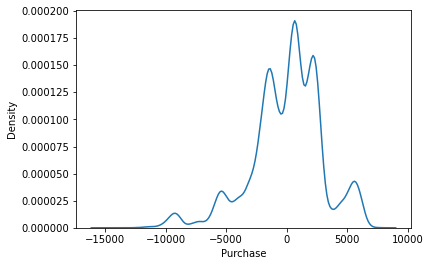

In [74]:
sns.kdeplot(train_y - train_pred)

<AxesSubplot:xlabel='Purchase'>

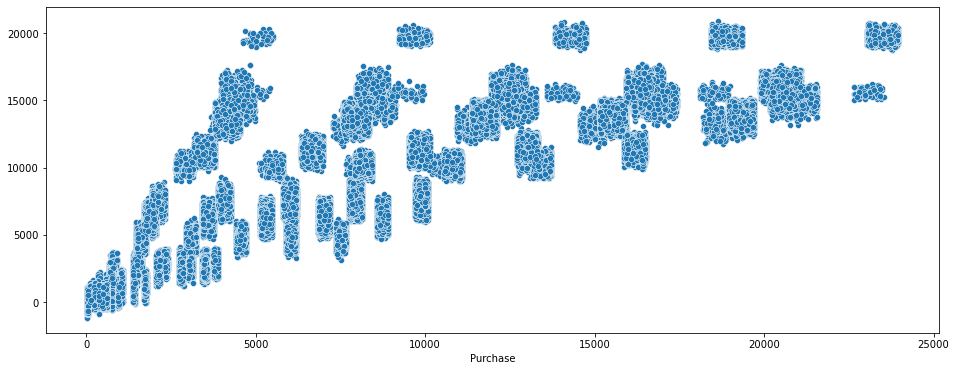

In [75]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = train_y, y = train_pred)

In [76]:
test_pre = lm.predict(test_X)

In [77]:
test_pre

array([13326.23831264, 10844.5987518 ,  5765.35591724, ...,
       13426.52347884, 20243.74881822,  2121.83411936])

In [78]:
sample_df_3 = sample_df.copy()

sample_df_3['Purchase'] = test_pre

In [79]:
sample_df_3.to_csv('5th attempt.csv', index = False)

### Another method

In [85]:
df_3 = df_2.copy()

In [86]:
df_3['Product_ID'] = df_3.Product_ID.apply(lambda x : int(x.replace('P00','')))
#Removing P00 common values from product ID

In [87]:
df_3['User_ID'] = df_3.User_ID.apply(lambda x : x-1000000)
#User ID is subracted from 1000000

In [112]:
df_3

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,69042,F,0-17,10,A,2,0,3,15.0,12.0,8370.0,train
1,1000001,248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,87842,F,0-17,10,A,2,0,12,3.0,9.0,1422.0,train
3,1000001,85442,F,0-17,10,A,2,0,12,14.0,13.0,1057.0,train
4,1000002,285442,M,55+,16,C,4+,0,8,3.0,9.0,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,118942,F,26-35,15,B,4+,1,8,7.0,12.0,NaN,test
233595,1006036,254642,F,26-35,15,B,4+,1,5,8.0,9.0,NaN,test
233596,1006036,31842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,124742,F,46-50,1,C,4+,0,10,16.0,13.0,NaN,test


In [65]:
a=df['Product_Category_2'].mean()

In [67]:
df['Product_Category_2'].fillna(value=a, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(3),

In [113]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  object 
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  object 
 8   Product_Category_1          783667 non-null  object 
 9   Product_Category_2          783667 non-null  object 
 10  Product_Category_3          783667 non-null  object 
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(1),

In [114]:
df_3.Product_ID.nunique()

3677

In [88]:
df_3.Occupation = df_3.Occupation.apply(lambda x : str(x))

df_3.Marital_Status =  df_3.Marital_Status.apply(lambda x : str(x))

df_3.Product_Category_1 = df_3.Product_Category_1.apply(lambda x : str(x))

df_3.Product_Category_2 = df_3.Product_Category_2.apply(lambda x : str(x))

df_3.Product_Category_3 = df_3.Product_Category_3.apply(lambda x : str(x))


df_number_columns = df_3.select_dtypes(include=np.number).columns


df_category_columns = df_3.select_dtypes(exclude=np.number).columns


data_to_encode = df_3[df_category_columns].drop( 'Source', axis = 1)

data_to_encode.shape
###########
data_encoded = pd.get_dummies(data_to_encode)

data_encoded.shape

data_encoded

final_df = pd.concat([df_3[df_number_columns], data_encoded, df_3['Source']], axis = 1)

### Modeling



train_data = final_df.loc[final_df['Source'] == 'train']

test_data = final_df.loc[final_df['Source'] == 'test']

test_data = final_df.loc[final_df['Source'] == 'test']

train_data.info()

train_data.drop(['Source'] , axis = 1, inplace = True)

test_data.drop(['Source'] , axis = 1, inplace = True)

train_X = train_data.drop(['Purchase'], axis = 1)

train_y = train_data['Purchase']

train_y

test_X = test_data.drop('Purchase', axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 97 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  int64  
 2   Purchase                       550068 non-null  float64
 3   Gender_F                       550068 non-null  uint8  
 4   Gender_M                       550068 non-null  uint8  
 5   Age_0-17                       550068 non-null  uint8  
 6   Age_18-25                      550068 non-null  uint8  
 7   Age_26-35                      550068 non-null  uint8  
 8   Age_36-45                      550068 non-null  uint8  
 9   Age_46-50                      550068 non-null  uint8  
 10  Age_51-55                      550068 non-null  uint8  
 11  Age_55+                        550068 non-null  uint8  
 12  Occupation_0                  

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [128]:
df_3['User_ID']

0        -1.753057
1        -1.753057
2        -1.753057
3        -1.753057
4        -1.752478
            ...   
233594    1.740904
233595    1.740904
233596    1.740904
233597    1.741483
233598    1.742641
Name: User_ID, Length: 783667, dtype: float64

### Standard Scaler

In [81]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()

In [90]:
df_3['Product_ID'] = sc.fit_transform(df_3[['Product_ID']])

In [91]:
df_3['User_ID'] = sc.fit_transform(df_3[['User_ID']])

In [92]:
train_X

,User_ID,Product_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_7.0,Product_Category_3_8.0,Product_Category_3_9.0
0,1,69042,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,248942,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,87842,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,85442,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,285442,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,6033,372445,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
550064,6035,375436,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
550065,6036,375436,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
550066,6038,375436,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [93]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

print(metrics.r2_score(train_y, train_pred))

metrics.mean_absolute_error(train_y, train_pred)

0.6451959066977756


2264.933632325108

In [94]:
print('Train MAE: ',metrics.mean_absolute_error(train_y, train_pred))

print('Train MSE: ',metrics.mean_squared_error(train_y, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

print('Train R2: ', metrics.r2_score(train_y, train_pred))

Train MAE:  2264.933632325108
Train MSE:  8952111.779557386
Train RSME:  2992.0079845410482
Train R2:  0.6451959066977756


In [95]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

print(metrics.r2_score(train_y, train_pred))

metrics.mean_absolute_error(train_y, train_pred)

0.6451959066977756


2264.933632325108

In [97]:
test_pre = lm.predict(test_X)

In [98]:
sample = pd.read_csv('sample_submission.csv')

In [99]:
sample['Purchase'] = test_pre

In [100]:
sample.to_csv('Stan Scling encoded  predict.csv', index =False)

In [101]:
train_X

,User_ID,Product_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_7.0,Product_Category_3_8.0,Product_Category_3_9.0
0,1,69042,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,248942,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,87842,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,85442,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,285442,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,6033,372445,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
550064,6035,375436,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
550065,6036,375436,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
550066,6038,375436,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Standard Scaling

In [102]:
lm = LinearRegression()

lm.fit(train_X, train_y)

train_pred = lm.predict(train_X)

print(metrics.r2_score(train_y, train_pred))

print(np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

metrics.mean_absolute_error(train_y, train_pred)

0.6451959066977756
2992.0079845410482


2264.933632325108

In [103]:
test_pre = lm.predict(test_X)

In [104]:
test_pre

array([13492.55342088, 10942.87658644,  5571.63756475, ...,
       13660.21369109, 20188.13115527,  1783.21385919])

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

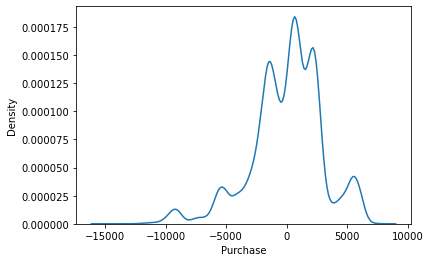

In [105]:
sns.kdeplot(train_y - train_pred)

<AxesSubplot:xlabel='Purchase'>

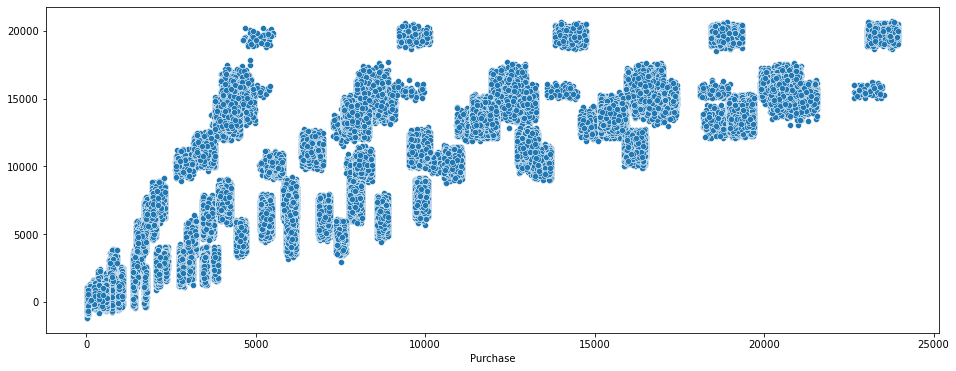

In [106]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = train_y, y = train_pred)

### Homoscedasticity

<AxesSubplot:xlabel='Purchase', ylabel='Purchase'>

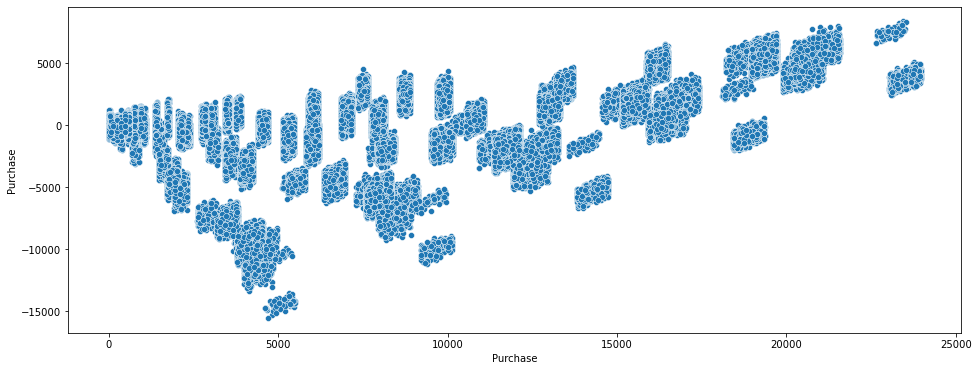

In [107]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = train_y, y = (train_y - train_pred))

### KNN Regressor

In [90]:
train_X = train_X.drop('User_ID',axis=1)

In [91]:
pd.set_option('display.max_columns',None)

In [92]:
train_X

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,3,12.0,10.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,6.0,14.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,12,11.0,14.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,12,14.0,7.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,8,8.0,10.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,20,8.0,8.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
550064,0,20,9.0,4.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
550065,1,20,9.0,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
550066,0,20,9.0,4.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


#### Decision_Tree

In [137]:
dtree = DecisionTreeRegressor(random_state=100)

In [110]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=100)
#spliting data

In [136]:
X_train

,User_ID,Product_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_2,Product_Category_1_20,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_7.0,Product_Category_3_8.0,Product_Category_3_9.0
362204,-0.742790,-0.086173,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
355271,-1.317687,0.734852,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
241276,-1.057160,-0.345855,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
111691,1.268481,0.553270,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45457,-1.164844,0.504458,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344414,1.149797,1.660336,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
212912,-0.076998,-0.004168,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
65615,0.586479,-0.980417,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
210755,-0.305683,1.097041,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [138]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=100)

In [139]:
test_pred_dtre = dtree.predict(X_test)

In [141]:
print(metrics.r2_score(y_test, test_pred_dtre))

print(np.sqrt(metrics.mean_squared_error(y_test, test_pred_dtre)))

0.44592163356456427
3739.599550914246


In [144]:
dtree.fit(train_X,train_y)

DecisionTreeRegressor(random_state=100)

In [145]:
test_X

,User_ID,Product_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_2,Product_Category_1_20,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_7.0,Product_Category_3_8.0,Product_Category_3_9.0
0,-1.751321,-0.442504,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.748426,-0.593823,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-1.747847,1.114613,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.747847,-0.282399,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.747268,-1.175667,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1.740904,-0.540129,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
233595,1.740904,0.784641,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
233596,1.740904,-1.390442,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
233597,1.741483,-0.483507,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0

In [146]:
final_pred = dtree.predict(test_X)

In [149]:
test_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Source
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,test


In [151]:
sample_df['Purchase'] = final_pred
sample_df.to_csv('Dtree.csv',index=False)

### XGB

In [164]:
cls = XGBRegressor(eta=0.03, min_child_weight=10,subsample = 0.8, colsample_bytree=0.7, max_depth = 10,seed=0,verbosity=3)

In [155]:
params = {}
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["max_depth"] = 10
params["seed"] = 0
plst = list(params.items())
num_rounds = 1100


In [156]:
plst

[('eta', 0.03),
 ('min_child_weight', 10),
 ('subsample', 0.8),
 ('colsample_bytree', 0.7),
 ('max_depth', 10),
 ('seed', 0)]

In [158]:
cls.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
train_pred_xgb = cls.predict(X_test)

In [160]:
print(metrics.r2_score(y_test, train_pred_xgb))

print(np.sqrt(metrics.mean_squared_error(y_test, train_pred_xgb)))

0.7202500818511126
2657.2014828189645


In [165]:
cls.fit(train_X,train_y)

[15:56:43] DEBUG: ../src/gbm/gbtree.cc:154: Using tree method: 2
[15:56:46] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 318 extra nodes, 0 pruned nodes, max_depth=10
[15:56:48] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 528 extra nodes, 0 pruned nodes, max_depth=10
[15:56:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 540 extra nodes, 0 pruned nodes, max_depth=10
[15:56:53] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 528 extra nodes, 0 pruned nodes, max_depth=10
[15:56:55] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 442 extra nodes, 0 pruned nodes, max_depth=10
[15:56:57] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 548 extra nodes, 0 pruned nodes, max_depth=10
[15:57:00] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 408 extra nodes, 0 pruned nodes, max_depth=10
[15:57:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 572 extra nodes, 0 pruned nodes, max_depth=10
[15:57:04] INFO

[15:59:33] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1024 extra nodes, 0 pruned nodes, max_depth=10
[15:59:36] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1086 extra nodes, 0 pruned nodes, max_depth=10
[15:59:38] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1124 extra nodes, 0 pruned nodes, max_depth=10
[15:59:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 644 extra nodes, 0 pruned nodes, max_depth=10
[15:59:43] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1108 extra nodes, 0 pruned nodes, max_depth=10
[15:59:45] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 860 extra nodes, 0 pruned nodes, max_depth=10
[15:59:47] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1042 extra nodes, 0 pruned nodes, max_depth=10
[15:59:50] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 872 extra nodes, 0 pruned nodes, max_depth=10
[15:59:52] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1156 e

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0299999993, max_delta_step=0, max_depth=10,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=3)

In [167]:
test_X

,User_ID,Product_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_2,Occupation_20,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_2,Product_Category_1_20,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_7.0,Product_Category_3_8.0,Product_Category_3_9.0
0,-1.751321,-0.442504,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.748426,-0.593823,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-1.747847,1.114613,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.747847,-0.282399,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.747268,-1.175667,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1.740904,-0.540129,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
233595,1.740904,0.784641,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
233596,1.740904,-1.390442,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
233597,1.741483,-0.483507,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0

In [168]:
test_pred = cls.predict(test_X)

In [169]:
sample_df['Purchase'] = test_pred
sample_df.to_csv('XGB.csv',index=False)

#### CAt boost

In [24]:
cat = CatBoostRegressor(verbose=2,learning_rate=0.1,depth=10,l2_leaf_reg=15)

In [ ]:

grid = {'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [15]}


In [185]:
cat.fit(X_train,y_train)

0:	learn: 4723.3537465	total: 174ms	remaining: 2m 53s
2:	learn: 4250.5131927	total: 479ms	remaining: 2m 39s
4:	learn: 3907.6588389	total: 789ms	remaining: 2m 37s
6:	learn: 3661.5059287	total: 1.18s	remaining: 2m 47s
8:	learn: 3482.9763223	total: 1.53s	remaining: 2m 48s
10:	learn: 3352.7500532	total: 1.79s	remaining: 2m 40s
12:	learn: 3254.2996908	total: 2s	remaining: 2m 31s
14:	learn: 3186.9419704	total: 2.21s	remaining: 2m 25s
16:	learn: 3134.9313772	total: 2.45s	remaining: 2m 21s
18:	learn: 3098.0600569	total: 2.65s	remaining: 2m 16s
20:	learn: 3069.0414228	total: 3.01s	remaining: 2m 20s
22:	learn: 3041.1423770	total: 3.19s	remaining: 2m 15s
24:	learn: 3020.6086828	total: 3.43s	remaining: 2m 13s
26:	learn: 3000.4203564	total: 3.6s	remaining: 2m 9s
28:	learn: 2984.7093054	total: 3.81s	remaining: 2m 7s
30:	learn: 2974.2921982	total: 3.97s	remaining: 2m 3s
32:	learn: 2964.4072051	total: 4.17s	remaining: 2m 2s
34:	learn: 2954.3148014	total: 4.34s	remaining: 1m 59s
36:	learn: 2946.1795143

296:	learn: 2623.5004489	total: 31.1s	remaining: 1m 13s
298:	learn: 2622.6834885	total: 31.2s	remaining: 1m 13s
300:	learn: 2621.7031046	total: 31.4s	remaining: 1m 13s
302:	learn: 2620.6313418	total: 31.6s	remaining: 1m 12s
304:	learn: 2619.7581359	total: 31.8s	remaining: 1m 12s
306:	learn: 2618.7109764	total: 32s	remaining: 1m 12s
308:	learn: 2617.8380460	total: 32.2s	remaining: 1m 11s
310:	learn: 2616.8610111	total: 32.4s	remaining: 1m 11s
312:	learn: 2615.9487519	total: 32.6s	remaining: 1m 11s
314:	learn: 2615.0747370	total: 32.8s	remaining: 1m 11s
316:	learn: 2614.2454551	total: 33s	remaining: 1m 11s
318:	learn: 2613.3502284	total: 33.2s	remaining: 1m 10s
320:	learn: 2612.2554251	total: 33.4s	remaining: 1m 10s
322:	learn: 2611.3257392	total: 33.6s	remaining: 1m 10s
324:	learn: 2610.3964183	total: 33.8s	remaining: 1m 10s
326:	learn: 2609.2927257	total: 34s	remaining: 1m 9s
328:	learn: 2608.4323807	total: 34.2s	remaining: 1m 9s
330:	learn: 2607.4197055	total: 34.4s	remaining: 1m 9s
3

598:	learn: 2520.8894311	total: 1m	remaining: 40.7s
600:	learn: 2520.3363997	total: 1m 1s	remaining: 40.5s
602:	learn: 2519.7917875	total: 1m 1s	remaining: 40.3s
604:	learn: 2519.3024617	total: 1m 1s	remaining: 40.1s
606:	learn: 2518.8880747	total: 1m 1s	remaining: 39.9s
608:	learn: 2518.5952010	total: 1m 1s	remaining: 39.6s
610:	learn: 2518.1014712	total: 1m 1s	remaining: 39.4s
612:	learn: 2517.5049784	total: 1m 2s	remaining: 39.2s
614:	learn: 2517.0210027	total: 1m 2s	remaining: 39s
616:	learn: 2516.6742784	total: 1m 2s	remaining: 38.8s
618:	learn: 2516.3301964	total: 1m 2s	remaining: 38.7s
620:	learn: 2515.9159966	total: 1m 2s	remaining: 38.4s
622:	learn: 2515.3574553	total: 1m 3s	remaining: 38.3s
624:	learn: 2514.8532166	total: 1m 3s	remaining: 38s
626:	learn: 2514.3721355	total: 1m 3s	remaining: 37.8s
628:	learn: 2513.8529247	total: 1m 3s	remaining: 37.6s
630:	learn: 2513.3312668	total: 1m 3s	remaining: 37.4s
632:	learn: 2512.8351320	total: 1m 4s	remaining: 37.2s
634:	learn: 2512.

894:	learn: 2460.6871503	total: 1m 29s	remaining: 10.6s
896:	learn: 2460.0861614	total: 1m 30s	remaining: 10.3s
898:	learn: 2459.8032658	total: 1m 30s	remaining: 10.1s
900:	learn: 2459.4723297	total: 1m 30s	remaining: 9.94s
902:	learn: 2459.1830743	total: 1m 30s	remaining: 9.74s
904:	learn: 2458.8004892	total: 1m 30s	remaining: 9.54s
906:	learn: 2458.4560129	total: 1m 31s	remaining: 9.34s
908:	learn: 2458.1450857	total: 1m 31s	remaining: 9.14s
910:	learn: 2457.7963386	total: 1m 31s	remaining: 8.94s
912:	learn: 2457.2676096	total: 1m 31s	remaining: 8.73s
914:	learn: 2456.8914463	total: 1m 31s	remaining: 8.53s
916:	learn: 2456.6351332	total: 1m 32s	remaining: 8.33s
918:	learn: 2456.3279937	total: 1m 32s	remaining: 8.13s
920:	learn: 2456.0635856	total: 1m 32s	remaining: 7.92s
922:	learn: 2455.7689197	total: 1m 32s	remaining: 7.72s
924:	learn: 2455.4684822	total: 1m 32s	remaining: 7.52s
926:	learn: 2455.1256981	total: 1m 33s	remaining: 7.32s
928:	learn: 2454.6326023	total: 1m 33s	remaining

In [186]:
test_pred_cat = cat.predict(X_test)

In [183]:
print(metrics.r2_score(y_test, test_pred_cat))

print(np.sqrt(metrics.mean_squared_error(y_test, test_pred_cat)))

0.726551857435834
2627.102337899711


In [187]:
print(metrics.r2_score(y_test, test_pred_cat))

print(np.sqrt(metrics.mean_squared_error(y_test, test_pred_cat)))

0.7420759535129732
2551.440346835255


In [25]:
cat.fit(train_X, train_y)

0:	learn: 4723.7148757	total: 183ms	remaining: 3m 3s
2:	learn: 4246.7748017	total: 540ms	remaining: 2m 59s
4:	learn: 3904.0058363	total: 785ms	remaining: 2m 36s
6:	learn: 3657.5250955	total: 1.03s	remaining: 2m 25s
8:	learn: 3480.2316064	total: 1.29s	remaining: 2m 22s
10:	learn: 3350.6919801	total: 1.66s	remaining: 2m 29s
12:	learn: 3253.1821615	total: 1.88s	remaining: 2m 22s
14:	learn: 3182.1640461	total: 2.14s	remaining: 2m 20s
16:	learn: 3132.9756891	total: 2.37s	remaining: 2m 17s
18:	learn: 3091.2874013	total: 2.66s	remaining: 2m 17s
20:	learn: 3060.6948622	total: 2.88s	remaining: 2m 14s
22:	learn: 3032.5168649	total: 3.13s	remaining: 2m 12s
24:	learn: 3012.6764593	total: 3.47s	remaining: 2m 15s
26:	learn: 2995.5661356	total: 3.73s	remaining: 2m 14s
28:	learn: 2981.8364413	total: 3.97s	remaining: 2m 12s
30:	learn: 2971.1371541	total: 4.25s	remaining: 2m 12s
32:	learn: 2960.0342585	total: 4.49s	remaining: 2m 11s
34:	learn: 2952.6406802	total: 4.73s	remaining: 2m 10s
36:	learn: 2943.

300:	learn: 2625.6859609	total: 47.6s	remaining: 1m 50s
302:	learn: 2624.7570543	total: 48s	remaining: 1m 50s
304:	learn: 2623.7587134	total: 48.2s	remaining: 1m 49s
306:	learn: 2622.7102739	total: 48.5s	remaining: 1m 49s
308:	learn: 2621.4173927	total: 48.8s	remaining: 1m 49s
310:	learn: 2620.3427505	total: 49.1s	remaining: 1m 48s
312:	learn: 2619.3398618	total: 49.4s	remaining: 1m 48s
314:	learn: 2618.1283020	total: 49.7s	remaining: 1m 47s
316:	learn: 2617.3267770	total: 49.9s	remaining: 1m 47s
318:	learn: 2616.3932270	total: 50.2s	remaining: 1m 47s
320:	learn: 2615.2697949	total: 50.5s	remaining: 1m 46s
322:	learn: 2614.4157195	total: 51s	remaining: 1m 46s
324:	learn: 2613.3752107	total: 51.4s	remaining: 1m 46s
326:	learn: 2612.6971124	total: 51.7s	remaining: 1m 46s
328:	learn: 2611.8476675	total: 51.9s	remaining: 1m 45s
330:	learn: 2610.9177314	total: 52.2s	remaining: 1m 45s
332:	learn: 2609.8712311	total: 52.5s	remaining: 1m 45s
334:	learn: 2608.5456530	total: 52.8s	remaining: 1m 

592:	learn: 2525.1412379	total: 1m 32s	remaining: 1m 3s
594:	learn: 2524.7535605	total: 1m 33s	remaining: 1m 3s
596:	learn: 2524.3871654	total: 1m 33s	remaining: 1m 3s
598:	learn: 2523.8998599	total: 1m 33s	remaining: 1m 2s
600:	learn: 2523.5226871	total: 1m 34s	remaining: 1m 2s
602:	learn: 2523.0404876	total: 1m 34s	remaining: 1m 2s
604:	learn: 2522.4789100	total: 1m 34s	remaining: 1m 1s
606:	learn: 2521.9324531	total: 1m 34s	remaining: 1m 1s
608:	learn: 2521.5126014	total: 1m 35s	remaining: 1m 1s
610:	learn: 2520.7972719	total: 1m 35s	remaining: 1m
612:	learn: 2520.3304611	total: 1m 35s	remaining: 1m
614:	learn: 2519.8649007	total: 1m 36s	remaining: 1m
616:	learn: 2519.4840002	total: 1m 36s	remaining: 59.8s
618:	learn: 2519.0706663	total: 1m 36s	remaining: 59.5s
620:	learn: 2518.6627983	total: 1m 36s	remaining: 59.2s
622:	learn: 2518.2147571	total: 1m 37s	remaining: 58.8s
624:	learn: 2517.6265236	total: 1m 37s	remaining: 58.6s
626:	learn: 2517.1315212	total: 1m 37s	remaining: 58.3s
6

888:	learn: 2467.7370844	total: 2m 20s	remaining: 17.6s
890:	learn: 2467.4507432	total: 2m 21s	remaining: 17.3s
892:	learn: 2467.1187450	total: 2m 21s	remaining: 16.9s
894:	learn: 2466.8446460	total: 2m 21s	remaining: 16.6s
896:	learn: 2466.4206398	total: 2m 21s	remaining: 16.3s
898:	learn: 2466.1038175	total: 2m 22s	remaining: 16s
900:	learn: 2465.7905193	total: 2m 22s	remaining: 15.6s
902:	learn: 2465.4981160	total: 2m 22s	remaining: 15.3s
904:	learn: 2465.1224710	total: 2m 22s	remaining: 15s
906:	learn: 2464.6919866	total: 2m 23s	remaining: 14.7s
908:	learn: 2464.4371185	total: 2m 23s	remaining: 14.4s
910:	learn: 2464.1613221	total: 2m 23s	remaining: 14s
912:	learn: 2463.8406279	total: 2m 24s	remaining: 13.7s
914:	learn: 2463.6206407	total: 2m 24s	remaining: 13.4s
916:	learn: 2463.2588191	total: 2m 24s	remaining: 13.1s
918:	learn: 2462.8712480	total: 2m 24s	remaining: 12.8s
920:	learn: 2462.4673660	total: 2m 25s	remaining: 12.5s
922:	learn: 2462.0909520	total: 2m 25s	remaining: 12.1

In [26]:
test_pred = cat.predict(test_X)

In [27]:
sample_df['Purchase'] = test_pred
sample_df.to_csv('Cat.csv',index=False)

In [28]:
import joblib

In [29]:
joblib.dump(cat,'Catboost')

['Catboost']